In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from imblearn.over_sampling import SMOTE

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
import xgboost as xgb 

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [15]:
import tensorflow as tf

In [16]:
from tensorflow import keras

In [17]:
df=pd.read_csv("african_crises.csv")


In [18]:
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [19]:
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [21]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [22]:
df.shape

(1059, 14)

In [23]:
df.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='case'>

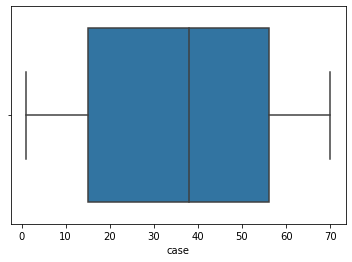

In [24]:
sns.boxplot(df['case'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

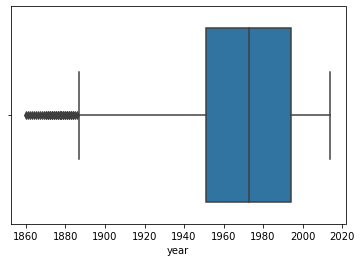

In [25]:
sns.boxplot(df['year'])

In [26]:
q1=df['year'].quantile(0.25)

In [27]:
q3=df['year'].quantile(0.75)

In [28]:
IQR=q3-q1

In [29]:
lower=q1-1.5*IQR

In [30]:
upper=q3+1.5*IQR

In [31]:
df=df[(df['year']>lower) & (df['year']<upper)]

In [32]:
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
15,1,DZA,Algeria,1939,0,0.44903,0,0,0.0,9.756098,0,0,0,no_crisis
16,1,DZA,Algeria,1940,0,0.49189,0,0,0.0,22.222222,0,0,1,no_crisis
17,1,DZA,Algeria,1941,0,0.44937,0,0,0.0,16.363636,0,0,0,no_crisis
18,1,DZA,Algeria,1942,0,0.75000,0,0,0.0,28.125000,0,0,1,no_crisis
19,1,DZA,Algeria,1943,0,0.50000,0,0,0.0,46.341463,0,1,1,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.80000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.20000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.90000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.90000,1,1,0.0,3.720000,1,0,0,no_crisis


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exch_usd'>

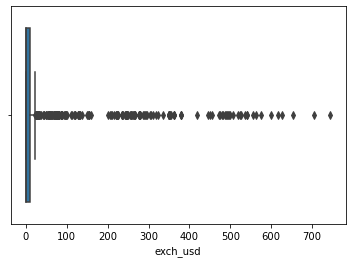

In [33]:
sns.boxplot(df['exch_usd'])

In [34]:
q1=df['exch_usd'].quantile(0.25)

In [35]:
q3=df['exch_usd'].quantile(0.75)

In [36]:
IQR=q3-q1

In [37]:
lower=q1-1.5*IQR

In [38]:
upper=q3+1.5*IQR

In [39]:
df=df[(df['exch_usd']>lower) & (df['exch_usd']<upper)]

In [40]:
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
15,1,DZA,Algeria,1939,0,4.490300e-01,0,0,0.0,9.756098e+00,0,0,0,no_crisis
16,1,DZA,Algeria,1940,0,4.918900e-01,0,0,0.0,2.222222e+01,0,0,1,no_crisis
17,1,DZA,Algeria,1941,0,4.493700e-01,0,0,0.0,1.636364e+01,0,0,0,no_crisis
18,1,DZA,Algeria,1942,0,7.500000e-01,0,0,0.0,2.812500e+01,0,0,1,no_crisis
19,1,DZA,Algeria,1943,0,5.000000e-01,0,0,0.0,4.634146e+01,0,1,1,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,70,ZWE,Zimbabwe,2004,1,5.600000e-23,1,1,0.0,1.327468e+02,1,1,1,crisis
1050,70,ZWE,Zimbabwe,2005,1,8.460000e-22,1,1,0.0,5.858444e+02,1,1,1,crisis
1051,70,ZWE,Zimbabwe,2006,1,3.000000e-19,1,1,0.0,1.281114e+03,1,1,1,crisis
1052,70,ZWE,Zimbabwe,2007,1,1.900000e-16,1,1,0.0,6.627989e+04,1,1,1,crisis


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inflation_annual_cpi'>

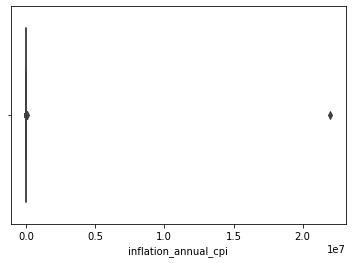

In [41]:
sns.boxplot(df['inflation_annual_cpi'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gdp_weighted_default'>

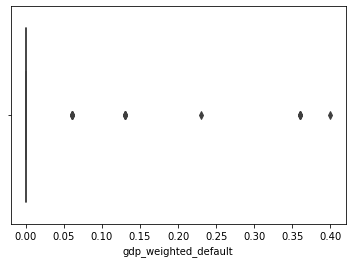

In [42]:
sns.boxplot(df['gdp_weighted_default'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sovereign_external_debt_default'>

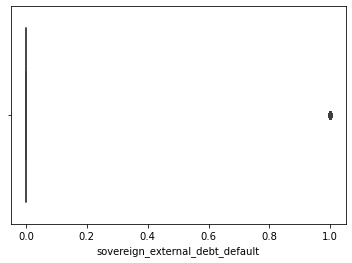

In [43]:
sns.boxplot(df['sovereign_external_debt_default'])

<AxesSubplot:xlabel='case', ylabel='count'>

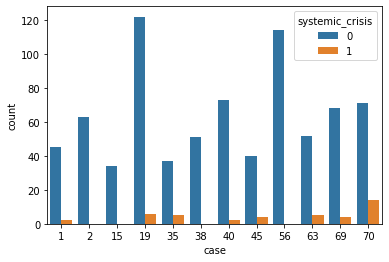

In [44]:
sns.countplot(x=df['case'],hue=df['systemic_crisis'])

<AxesSubplot:xlabel='cc3', ylabel='count'>

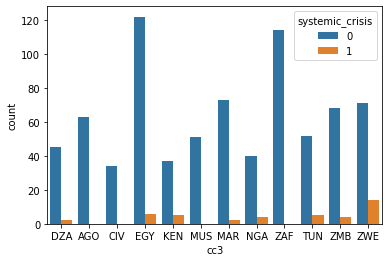

In [45]:
sns.countplot(x=df['cc3'],hue=df['systemic_crisis'])

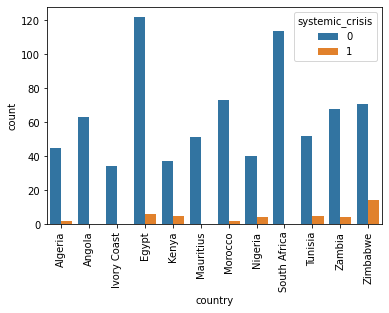

In [46]:
sns.countplot(x=df['country'],hue=df['systemic_crisis'])
plt.xticks(rotation=90)
plt.show()

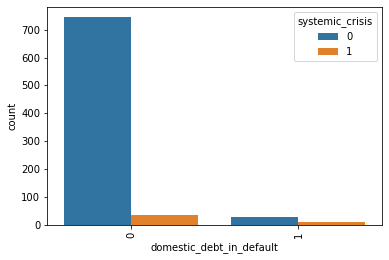

In [47]:
sns.countplot(x=df['domestic_debt_in_default'],hue=df['systemic_crisis'])
plt.xticks(rotation=90)
plt.show()

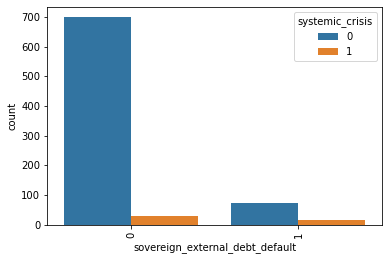

In [48]:
sns.countplot(x=df['sovereign_external_debt_default'],hue=df['systemic_crisis'])
plt.xticks(rotation=90)
plt.show()

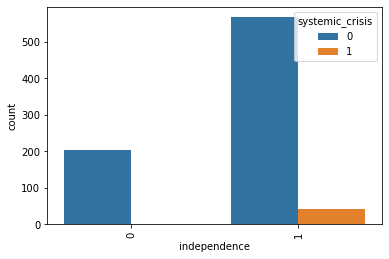

In [49]:
sns.countplot(x=df['independence'],hue=df['systemic_crisis'])
plt.xticks(rotation=90)
plt.show()

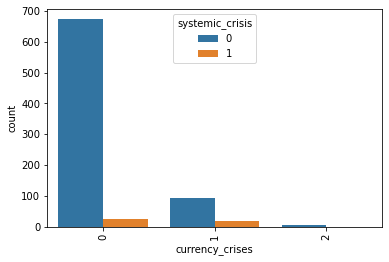

In [50]:
sns.countplot(x=df['currency_crises'],hue=df['systemic_crisis'])
plt.xticks(rotation=90)
plt.show()

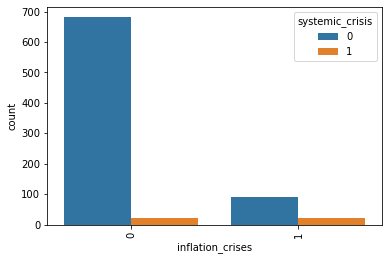

In [51]:
sns.countplot(x=df['inflation_crises'],hue=df['systemic_crisis'])
plt.xticks(rotation=90)
plt.show()

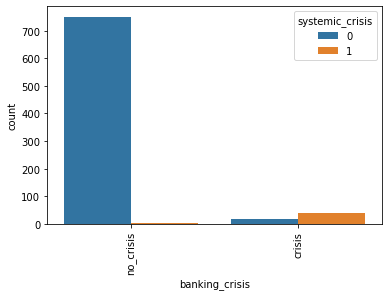

In [52]:
sns.countplot(x=df['banking_crisis'],hue=df['systemic_crisis'])
plt.xticks(rotation=90)
plt.show()

In [53]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
15,1,DZA,Algeria,1939,0,0.44903,0,0,0.0,9.756098,0,0,0,no_crisis
16,1,DZA,Algeria,1940,0,0.49189,0,0,0.0,22.222222,0,0,1,no_crisis
17,1,DZA,Algeria,1941,0,0.44937,0,0,0.0,16.363636,0,0,0,no_crisis
18,1,DZA,Algeria,1942,0,0.75000,0,0,0.0,28.125000,0,0,1,no_crisis
19,1,DZA,Algeria,1943,0,0.50000,0,0,0.0,46.341463,0,1,1,no_crisis


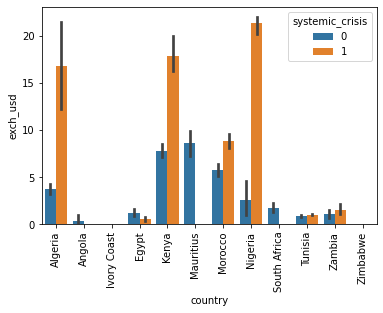

In [54]:
sns.barplot(x=df['country'],y=df['exch_usd'],hue=df['systemic_crisis'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='domestic_debt_in_default', ylabel='exch_usd'>

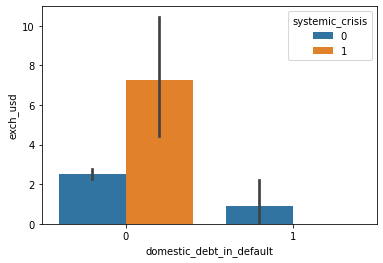

In [55]:
sns.barplot(x=df['domestic_debt_in_default'],y=df['exch_usd'],hue=df['systemic_crisis'])

<AxesSubplot:xlabel='sovereign_external_debt_default', ylabel='exch_usd'>

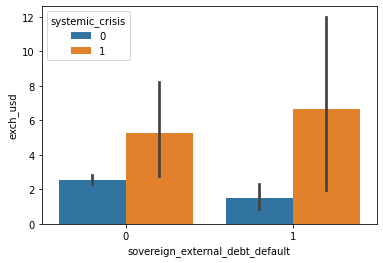

In [56]:
sns.barplot(x=df['sovereign_external_debt_default'],y=df['exch_usd'],hue=df['systemic_crisis'])

<AxesSubplot:xlabel='independence', ylabel='exch_usd'>

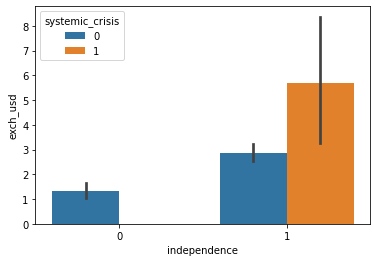

In [57]:
sns.barplot(x=df['independence'],y=df['exch_usd'],hue=df['systemic_crisis'])

<AxesSubplot:xlabel='currency_crises', ylabel='exch_usd'>

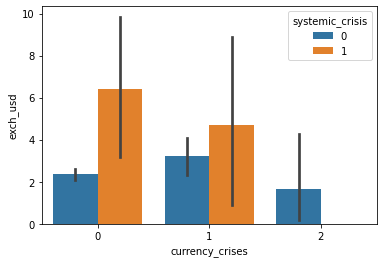

In [58]:
sns.barplot(x=df['currency_crises'],y=df['exch_usd'],hue=df['systemic_crisis'])

<AxesSubplot:xlabel='inflation_crises', ylabel='exch_usd'>

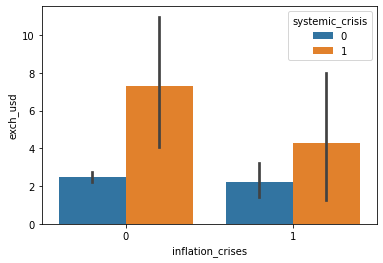

In [59]:
sns.barplot(x=df['inflation_crises'],y=df['exch_usd'],hue=df['systemic_crisis'])

In [60]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
15,1,DZA,Algeria,1939,0,0.44903,0,0,0.0,9.756098,0,0,0,no_crisis
16,1,DZA,Algeria,1940,0,0.49189,0,0,0.0,22.222222,0,0,1,no_crisis
17,1,DZA,Algeria,1941,0,0.44937,0,0,0.0,16.363636,0,0,0,no_crisis
18,1,DZA,Algeria,1942,0,0.75000,0,0,0.0,28.125000,0,0,1,no_crisis
19,1,DZA,Algeria,1943,0,0.50000,0,0,0.0,46.341463,0,1,1,no_crisis


<AxesSubplot:xlabel='cc3', ylabel='exch_usd'>

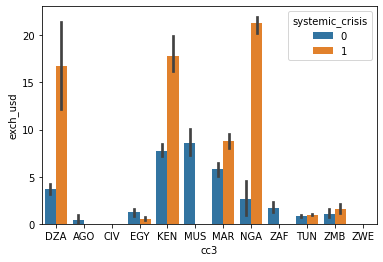

In [61]:
sns.barplot(x=df['cc3'],y=df['exch_usd'],hue=df['systemic_crisis'])

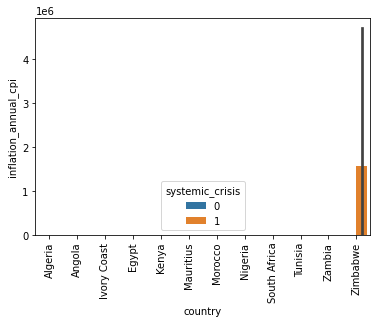

In [62]:
sns.barplot(x=df['country'],y=df['inflation_annual_cpi'],hue=df['systemic_crisis'])
plt.xticks(rotation=90)
plt.show()

In [63]:
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
15,1,DZA,Algeria,1939,0,4.490300e-01,0,0,0.0,9.756098e+00,0,0,0,no_crisis
16,1,DZA,Algeria,1940,0,4.918900e-01,0,0,0.0,2.222222e+01,0,0,1,no_crisis
17,1,DZA,Algeria,1941,0,4.493700e-01,0,0,0.0,1.636364e+01,0,0,0,no_crisis
18,1,DZA,Algeria,1942,0,7.500000e-01,0,0,0.0,2.812500e+01,0,0,1,no_crisis
19,1,DZA,Algeria,1943,0,5.000000e-01,0,0,0.0,4.634146e+01,0,1,1,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,70,ZWE,Zimbabwe,2004,1,5.600000e-23,1,1,0.0,1.327468e+02,1,1,1,crisis
1050,70,ZWE,Zimbabwe,2005,1,8.460000e-22,1,1,0.0,5.858444e+02,1,1,1,crisis
1051,70,ZWE,Zimbabwe,2006,1,3.000000e-19,1,1,0.0,1.281114e+03,1,1,1,crisis
1052,70,ZWE,Zimbabwe,2007,1,1.900000e-16,1,1,0.0,6.627989e+04,1,1,1,crisis


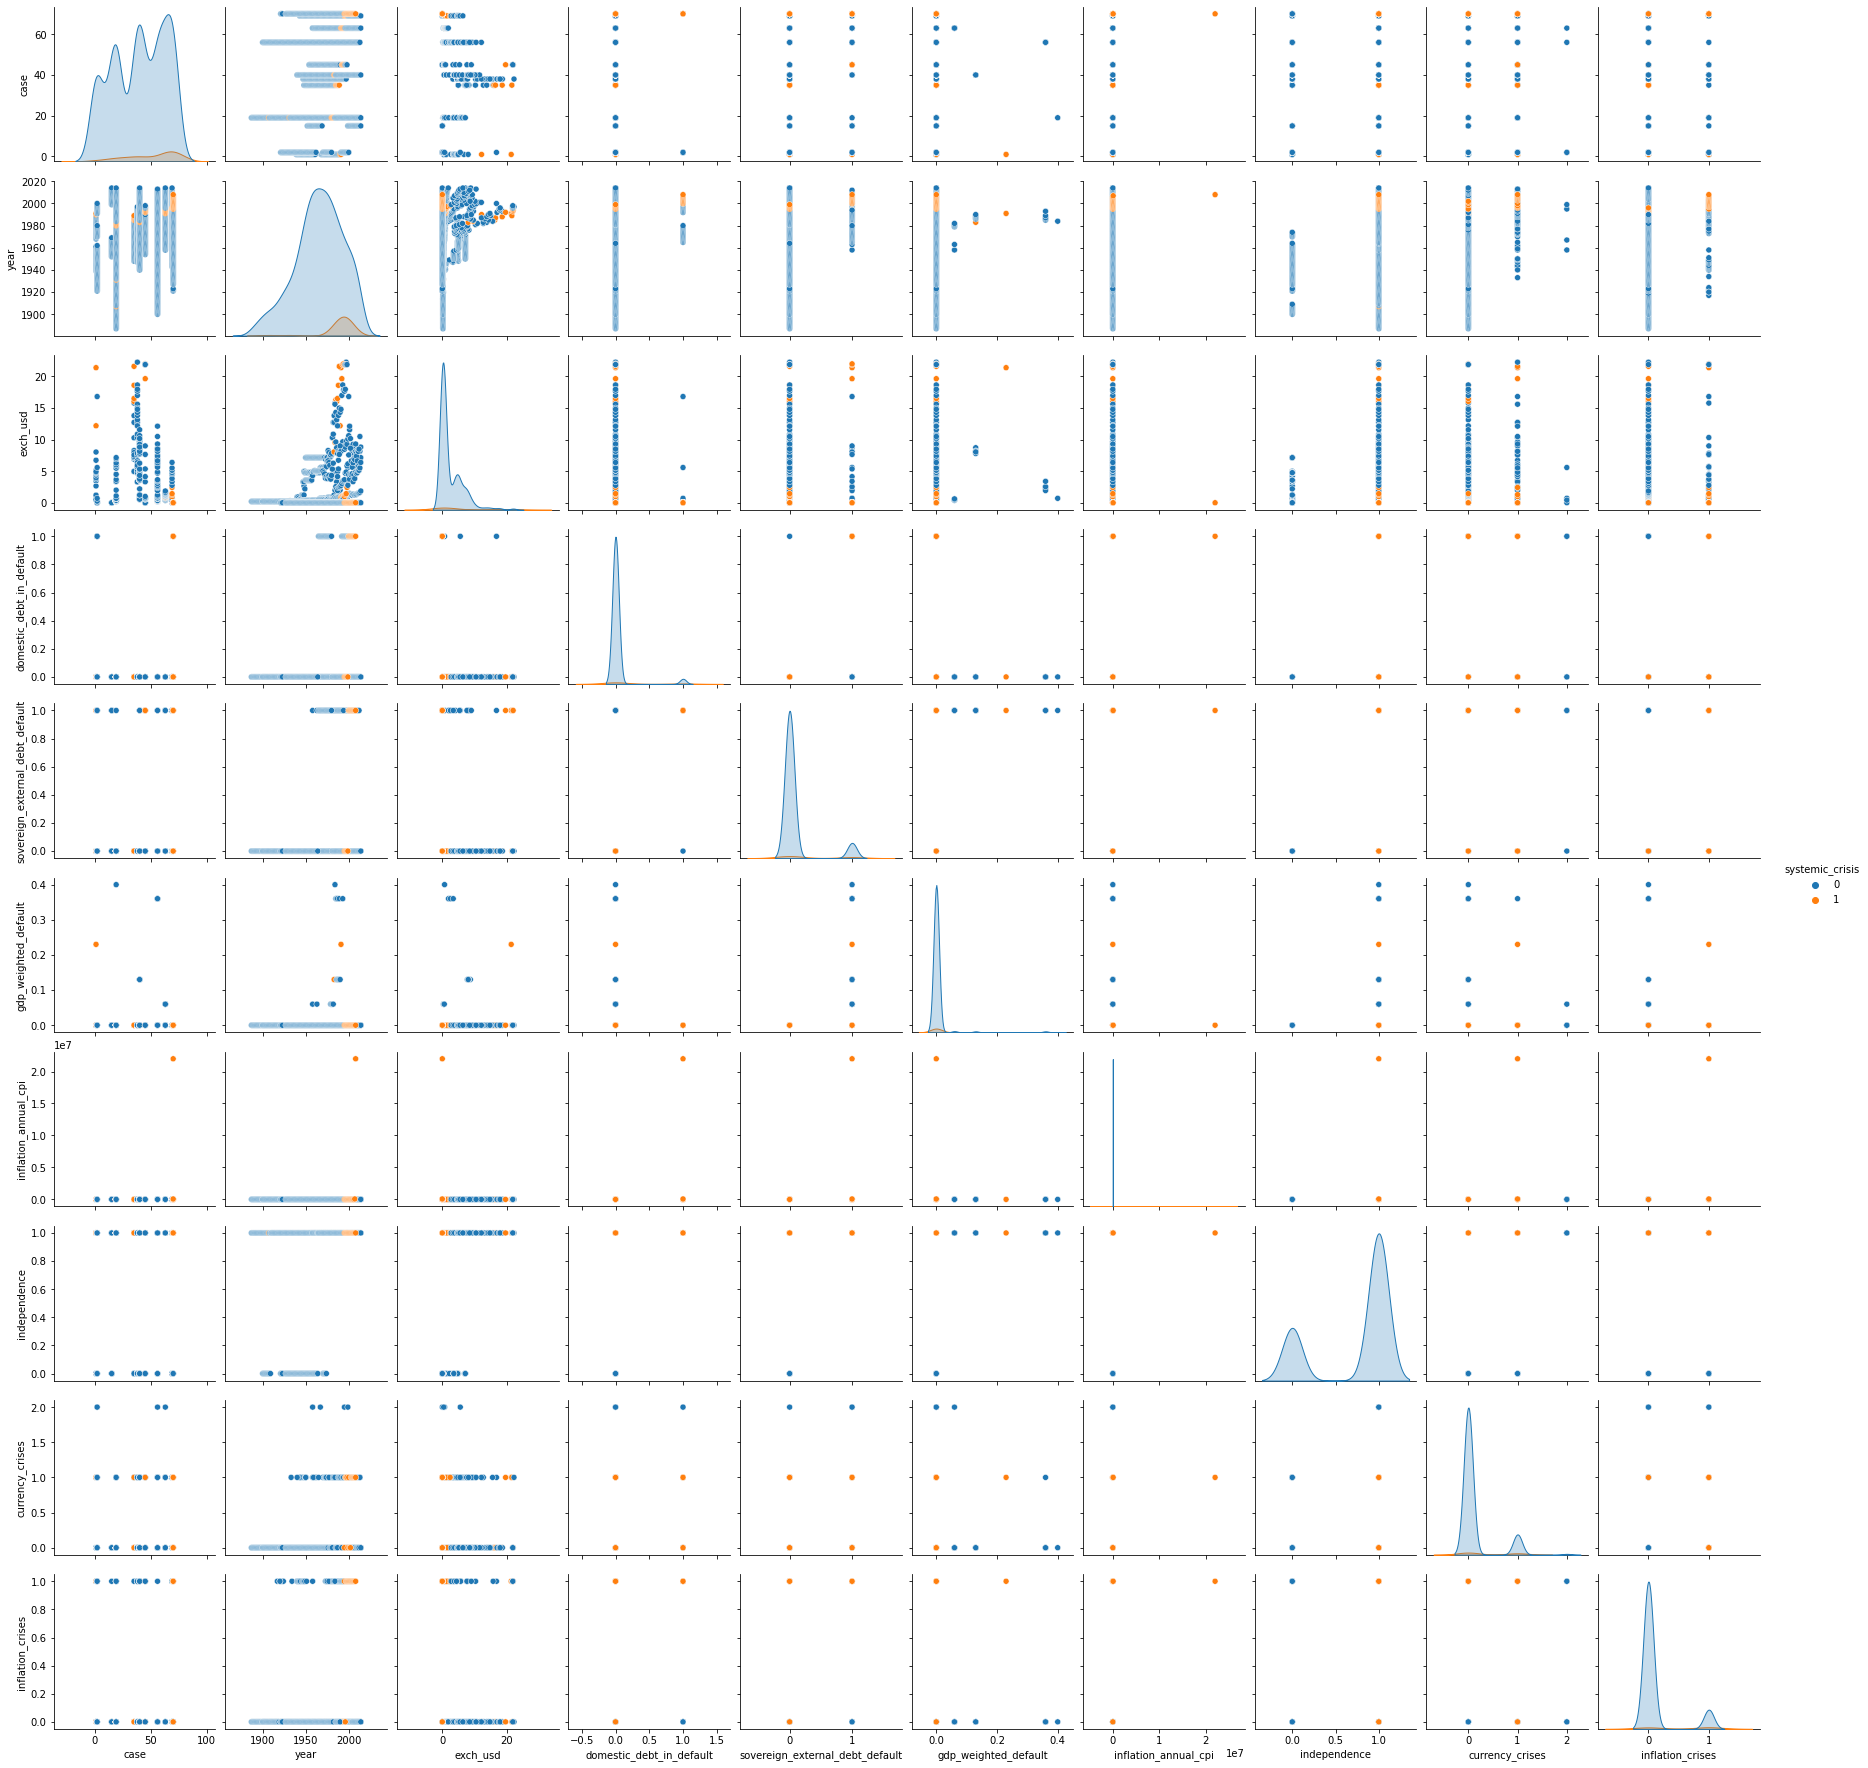

In [64]:
sns.pairplot(data=df,hue='systemic_crisis')

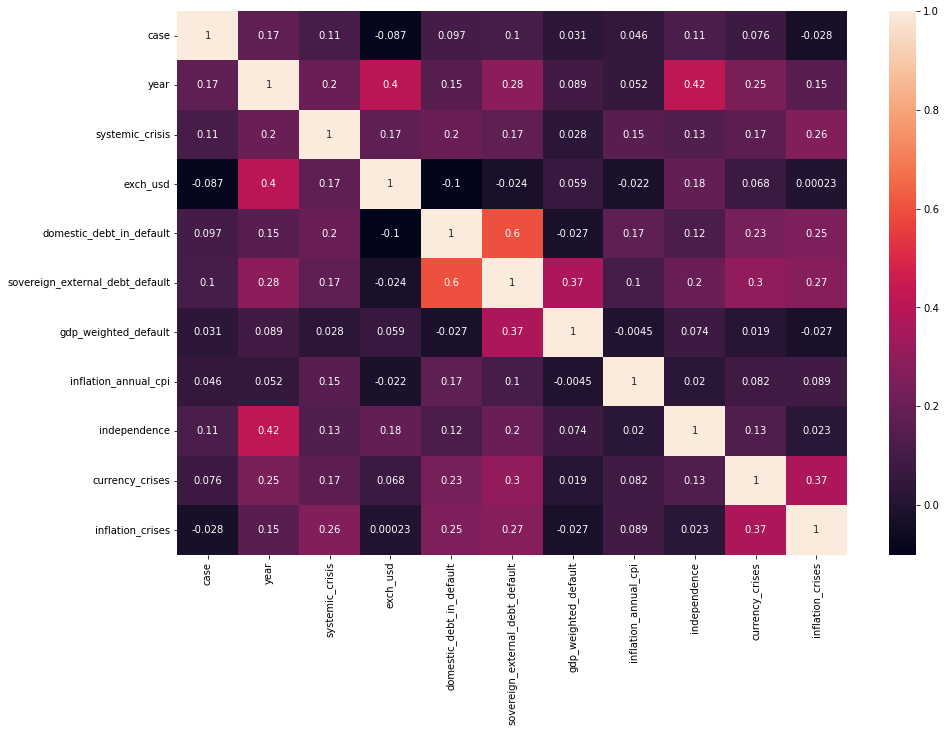

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='year', ylabel='inflation_annual_cpi'>

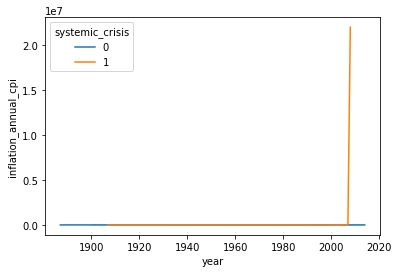

In [66]:
sns.lineplot(x=df['year'],y=df['inflation_annual_cpi'],hue=df['systemic_crisis'])

In [67]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
15,1,DZA,Algeria,1939,0,0.44903,0,0,0.0,9.756098,0,0,0,no_crisis
16,1,DZA,Algeria,1940,0,0.49189,0,0,0.0,22.222222,0,0,1,no_crisis
17,1,DZA,Algeria,1941,0,0.44937,0,0,0.0,16.363636,0,0,0,no_crisis
18,1,DZA,Algeria,1942,0,0.75000,0,0,0.0,28.125000,0,0,1,no_crisis
19,1,DZA,Algeria,1943,0,0.50000,0,0,0.0,46.341463,0,1,1,no_crisis


In [68]:
le=LabelEncoder()


In [69]:
df['cc3']=le.fit_transform(df['cc3'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_18212\2601168063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cc3']=le.fit_transform(df['cc3'])


In [70]:
df['country']=le.fit_transform(df['country'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18212\3078563146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country']=le.fit_transform(df['country'])


In [71]:
df['banking_crisis']=le.fit_transform(df['banking_crisis'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_18212\3012759036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['banking_crisis']=le.fit_transform(df['banking_crisis'])


In [72]:
df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
15,1,2,0,1939,0,0.44903,0,0,0.0,9.756098,0,0,0,1
16,1,2,0,1940,0,0.49189,0,0,0.0,22.222222,0,0,1,1
17,1,2,0,1941,0,0.44937,0,0,0.0,16.363636,0,0,0,1
18,1,2,0,1942,0,0.75000,0,0,0.0,28.125000,0,0,1,1
19,1,2,0,1943,0,0.50000,0,0,0.0,46.341463,0,1,1,1


In [73]:
X=df.drop(['systemic_crisis','sovereign_external_debt_default'],axis=1)

In [74]:
y=df['systemic_crisis']

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='systemic_crisis', ylabel='count'>

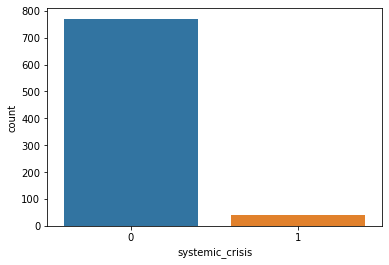

In [75]:
sns.countplot(y)

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
smote=SMOTE()

In [78]:
X_sm,y_sm=smote.fit_resample(X,y)


In [79]:
sc=StandardScaler()


In [80]:
X_sm=sc.fit_transform(X_sm)


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [82]:
X_train.shape

(1232, 12)

In [83]:
y_train.shape

(1232,)

# LogisticRegression

In [84]:
lr=LogisticRegression()


In [85]:
lr.fit(X_train,y_train)

LogisticRegression()

In [86]:
y_pred=lr.predict(X_train)

In [87]:
accuracy_score(y_train,y_pred)

0.9918831168831169

In [88]:
y_pred=lr.predict(X_test)

In [89]:
accuracy_score(y_test,y_pred)

0.9902597402597403

In [90]:
KF=KFold(5)

In [91]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)

In [92]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.9838709677419355
1 1.0
2 0.9838709677419355
3 0.9508196721311475
4 1.0


In [93]:
scores.mean()

0.9837123215230037

# RandomForestClassifier

In [94]:
rfc=RandomForestClassifier()


In [95]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [96]:
y_pred=rfc.predict(X_train)

In [97]:
accuracy_score(y_train,y_pred)

1.0

In [98]:
y_pred=rfc.predict(X_test)

In [99]:
accuracy_score(y_test,y_pred)

0.9935064935064936

In [100]:
KF=KFold(5)

In [101]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)

In [102]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.9838709677419355
1 0.9838709677419355
2 0.9838709677419355
3 0.9508196721311475
4 1.0


In [103]:
scores.mean()

0.9804865150713908

# KNeighborsClassifier

In [104]:
knc=KNeighborsClassifier()


In [105]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [106]:
y_pred=knc.predict(X_train)

In [107]:
accuracy_score(y_train,y_pred)

0.9967532467532467

In [108]:
y_pred=knc.predict(X_test)

In [109]:
accuracy_score(y_test,y_pred)

0.9902597402597403

In [110]:
KF=KFold(5)

In [111]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)

In [112]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.9354838709677419
1 0.9354838709677419
2 0.9193548387096774
3 0.9508196721311475
4 1.0


In [113]:
scores.mean()

0.9482284505552616

# XGBClassifier

In [114]:
xgb_i=xgb.XGBClassifier()

In [115]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [116]:
y_pred=xgb_i.predict(X_train)

In [117]:
accuracy_score(y_train,y_pred)

1.0

In [118]:
y_pred=xgb_i.predict(X_test)

In [119]:
accuracy_score(y_test,y_pred)

0.9902597402597403

In [120]:
KF=KFold(5)

In [121]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)

In [122]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.9838709677419355
1 0.9838709677419355
2 0.9838709677419355
3 0.9508196721311475
4 1.0


In [123]:
scores.mean()

0.9804865150713908

# DecisionTreeClassifier

In [124]:
dtc=DecisionTreeClassifier()


In [125]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [126]:
y_pred=dtc.predict(X_train)

In [127]:
accuracy_score(y_train,y_pred)

1.0

In [128]:
y_pred=dtc.predict(X_test)

In [129]:
accuracy_score(y_test,y_pred)

0.9902597402597403

In [130]:
KF=KFold(5)

In [131]:
scores=cross_val_score(dtc,X_test,y_test,cv=KF)

In [132]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.9838709677419355
1 0.9838709677419355
2 0.9838709677419355
3 0.9672131147540983
4 1.0


In [133]:
scores.mean()

0.983765203595981

# GaussianNB

In [134]:
model=GaussianNB()


In [135]:
model.fit(X_train,y_train)

GaussianNB()

In [136]:
y_pred=model.predict(X_train)

In [137]:
accuracy_score(y_train,y_pred)

0.987012987012987

In [138]:
y_pred=model.predict(X_test)

In [139]:
accuracy_score(y_test,y_pred)

0.9837662337662337

In [140]:
KF=KFold(5)

In [141]:
scores=cross_val_score(model,X_test,y_test,cv=KF)

In [142]:
for idx,value in enumerate(scores):
    print(idx,value)

0 0.9838709677419355
1 0.9516129032258065
2 0.9838709677419355
3 0.9508196721311475
4 1.0


In [143]:
scores.mean()

0.974034902168165

# ANN

In [144]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(12,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
    
])

In [145]:
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [146]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
39/39 [==============================] - 1s 2ms/step - loss: 0.7084 - accuracy: 0.5000
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.8320
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.9148
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2609 - accuracy: 0.9481
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.9708
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1186 - accuracy: 0.9821
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9878
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9919
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9919
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9919


In [147]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 4ms/step - loss: 0.0581 - accuracy: 0.9903


[0.05811654031276703, 0.9902597665786743]

In [148]:
y_pred=model.predict(X_test)


10/10 [==============================] - 0s 2ms/step


In [149]:
ypred=[]

for i in y_pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [150]:
ypred[:10]

[0, 1, 0, 0, 1, 1, 1, 1, 1, 1]

In [151]:
y_test[:10]

168     0
1117    1
30      0
185     0
973     1
1200    1
1509    1
1438    1
1036    1
818     1
Name: systemic_crisis, dtype: int64

In [152]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=ypred)

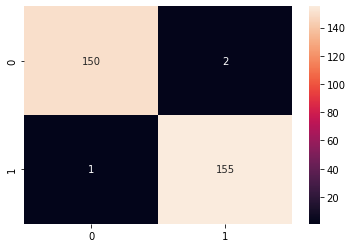

In [153]:
sns.heatmap(cm,fmt='d',annot=True)
plt.show()